In [ ]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

from pycaret.regression import *
import pandas as pd

!kaggle datasets download -d hanaksoy/customer-purchasing-behaviors

!unzip customer-purchasing-behaviors.zip

Dataset URL: https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors
License(s): CC0-1.0
customer-purchasing-behaviors.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-purchasing-behaviors.zip
replace Customer Purchasing Behaviors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Customer Purchasing Behaviors.csv  


In [ ]:
data = pd.read_csv('Customer Purchasing Behaviors.csv')

s = setup(data, target = 'purchase_amount', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,purchase_amount
2,Target type,Regression
3,Original data shape,"(238, 7)"
4,Transformed data shape,"(238, 10)"
5,Transformed train set shape,"(166, 10)"
6,Transformed test set shape,"(72, 10)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.4976,28.3561,3.5475,0.9983,0.0113,0.0049,0.1430
et,Extra Trees Regressor,1.4690,35.1692,3.3904,0.9979,0.0120,0.0055,0.2390
xgboost,Extreme Gradient Boosting,1.5012,35.4213,3.4992,0.9979,0.0132,0.0057,0.1160
rf,Random Forest Regressor,2.1590,41.0703,4.3800,0.9975,0.0151,0.0075,0.3100
dt,Decision Tree Regressor,1.5956,47.7206,3.9521,0.9972,0.0149,0.0062,0.0670
knn,K Neighbors Regressor,4.0750,74.8147,6.6834,0.9957,0.0222,0.0135,0.0800
lr,Linear Regression,8.0003,122.2156,10.4167,0.9925,0.0282,0.0211,0.0700
ridge,Ridge Regression,8.1049,121.7185,10.4334,0.9925,0.0276,0.0209,0.0950
br,Bayesian Ridge,8.0757,122.2847,10.4433,0.9925,0.0278,0.0210,0.0670
llar,Lasso Least Angle Regression,8.6615,128.0068,10.8818,0.9922,0.0280,0.0221,0.0660


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

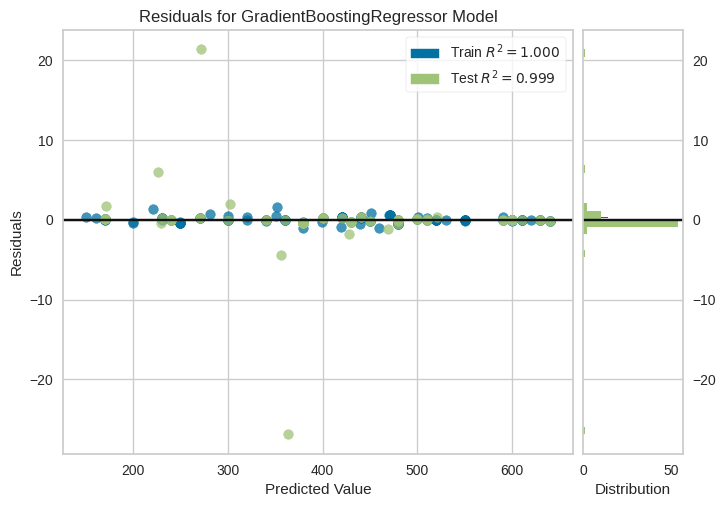

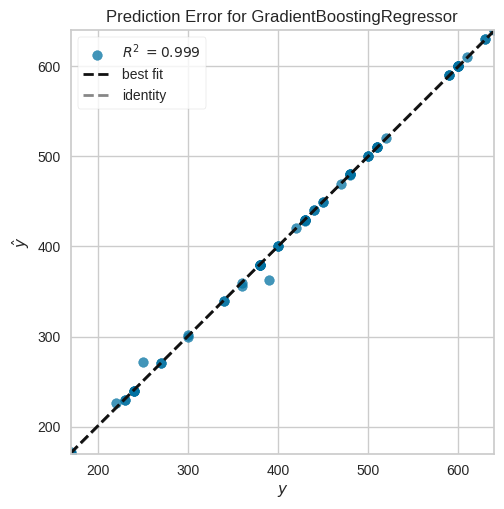

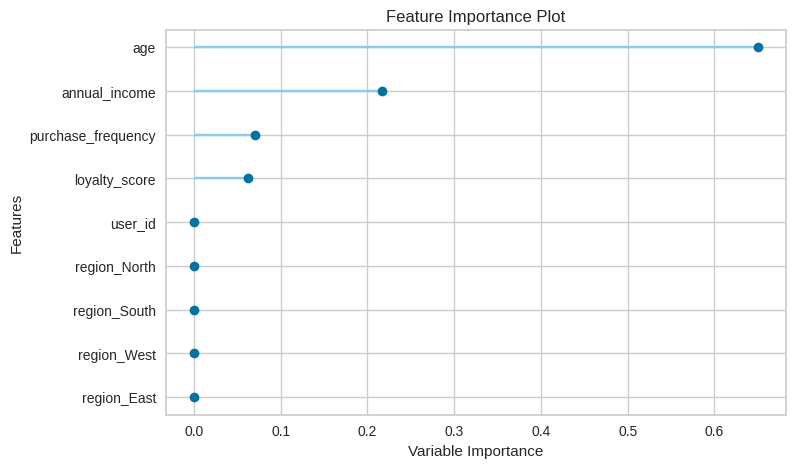

In [ ]:
plot_model(best, plot = 'residuals')
plot_model(best, plot = 'error')
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
holdout_pred = predict_model(best)
holdout_pred.head()

new_data = data.copy()
new_data.drop('purchase_amount', axis=1, inplace=True)
new_data.head()

predictions = predict_model(best, data = new_data)
predictions.head()

save_model(best, 'my_purchase_model')
loaded_best_pipeline = load_model('my_purchase_model')
loaded_best_pipeline

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.0362,17.3244,4.1623,0.9990,0.0133,0.0033


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['user_id', 'age', 'annual_income',
                                             'loyalty_score',
                                             'purchase_frequency'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])